# CAD Modeling

So after all the preprocessing, we now have 3 main datasets. Undersampled and Oversampled each have a standardized and normalized version of their data.

*   Original Dataset
*   Undersampled Dataset
*   Oversampled Dataset (SMOTE)

We now need to train and test with some models.

*   Random Forest Classifier
*   Naives Bayes
*   SVM



Small note: Conventions we will be using to refer to the type of dataset are the following:
*   us = Undersample
*   os = Oversample
*   std = Standardized
*   nrm = Normalized



Another thing to note:
Since this topic is related to health, we care more True Positive Rates and really don't like False Negative Rate. True Negative Rate would mean the patient has CAD, but the test could not identify that. Thus, recall is very important to look at in terms of evaluation.

# Original Train and Test

In [ ]:
# import libraries!

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# retrieve the original train and test set

# training data
X_train = pd.read_csv('original/X_train')
y_train = pd.read_csv('original/y_train')
y_train = y_train['CAD']

# test data
X_test = pd.read_csv('original/X_test')
y_test = pd.read_csv('original/y_test')
y_test = y_test['CAD']

# Undersample Train and Test Data

## Standardized Version

In [ ]:
# retrieved undersample training set
X_train_us_std = pd.read_csv('undersample_standardized/X_undersample_resampled_encoded_finished_stand_scaled_finished')
y_train_us_std = pd.read_csv('undersample_standardized/y_X_undersample_resampled_encoded_finished_stand_scaled_finished')
y_train_us_nrm = y_test_us_nrm['CAD']

# retrieve undersample test set
X_test_us_std = pd.read_csv('undersample_standardized/X_test_us_encoded_finished_stand_scaled_finished')
y_test_us_std = pd.read_csv('undersample_standardized/y_test_us_encoded_finished_stand_scaled_finished')
y_test_us_std = y_test_us_std['CAD']


In [ ]:
# To be done in another version I guess...
# from sklearn.model_selection import train_test_split
# # make validation set and save it.
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Normalized Version

In [ ]:
# retrieved undersample training set
X_train_us_nrm = pd.read_csv('undersample_normalized/X_undersample_resampled_encoded_finished_norm_scaled_finished')
y_train_us_nrm = pd.read_csv('undersample_normalized/y_X_undersample_resampled_encoded_finished_norm_scaled_finished')

# retrieve undersample test set
X_test_us_nrm = pd.read_csv('undersample_normalized/X_test_us_encoded_finished_norm_scaled_finished')
y_test_us_nrm = pd.read_csv('undersample_normalized/y_test_us_encoded_finished_norm_scaled_finished')
y_test_us_nrm = y_test_us_nrm['CAD']

In [ ]:
# make validation

# Oversample Train and Test Data

## Standardized Version

In [ ]:
# retrieved oversample training set
X_train_os_std = pd.read_csv('oversample_standardized/X_oversample_resampled_encoded_finished_stand_scaled_finished')
y_train_os_std = pd.read_csv('oversample_standardized/y_oversample_resampled_encoded_finished_stand_scaled_finished')

# retrieve oversample test set
X_test_os_std = pd.read_csv('oversample_standardized/X_test_os_encoded_finished_stand_scaled_finished')
y_test_os_std = pd.read_csv('oversample_standardized/y_test_os_encoded_finished_stand_scaled_finished')

## Normalized Version

In [ ]:
# retrieved oversample training set
X_train_os_nrm = pd.read_csv('oversample_normalized/X_oversample_resampled_encoded_finished_norm_scaled_finished')
y_train_os_nrm = pd.read_csv('oversample_normalized/y_oversample_resampled_encoded_finished_norm_scaled_finished')

# retrieve oversample test set
X_test_os_nrm = pd.read_csv('oversample_normalized/X_test_os_encoded_finished_norm_scaled_finished')
y_test_os_nrm = pd.read_csv('oversample_normalized/y_test_os_encoded_finished_norm_scaled_finished')

# Model 1: Random Forest Classifier

In [ ]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

## Undersample_Standardized

In [ ]:
# create the random forest classifier
rf_us_std_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier
rf_us_std_clf.fit(X_train_us_std, y_train_us_std)

<ipython-input-14-403023a620d6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_us_std_clf.fit(X_train_us_std, y_train_us_std)


RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred_us_std = rf_us_std_clf.predict(X_test_us_std)

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_us_std, y_pred_us_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_std, y_pred_us_std))

Accuracy: 0.7686440677966102
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.81      0.67       347
           1       0.91      0.75      0.82       833

    accuracy                           0.77      1180
   macro avg       0.74      0.78      0.75      1180
weighted avg       0.81      0.77      0.78      1180



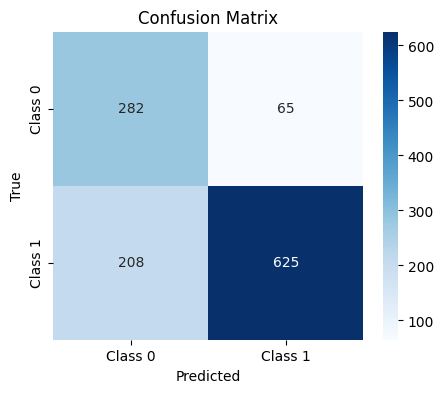

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_std, y_pred_us_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

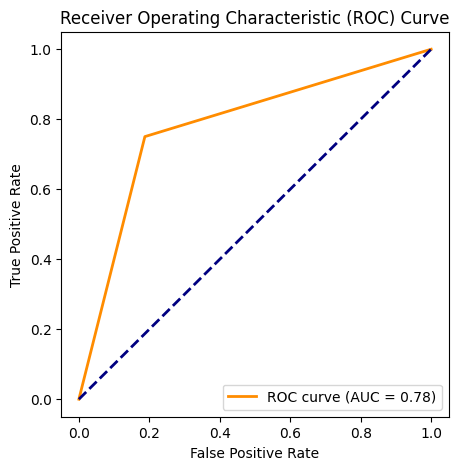

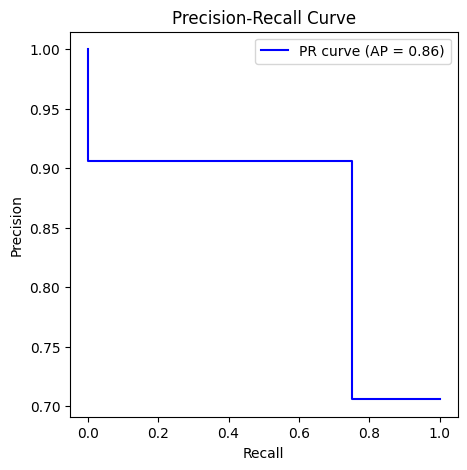

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_std, y_pred_us_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_std, y_pred_us_std)
average_precision = average_precision_score(y_test_us_std, y_pred_us_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


[7.37670663e-02 6.12949141e-02 6.65954680e-02 6.67931085e-02
 6.01755796e-02 5.97400558e-02 5.85277901e-02 6.52269592e-02
 5.96251598e-02 4.04759047e-03 4.51614371e-03 1.26758063e-02
 2.18872421e-01 1.35308635e-02 5.27002436e-03 1.04884465e-02
 1.89980580e-03 8.36550943e-03 5.64704838e-03 1.55358493e-02
 2.06137314e-02 9.33714050e-04 3.63630356e-03 2.77999947e-03
 6.05893267e-04 8.08248400e-03 3.00121854e-03 4.93670102e-04
 8.38319407e-03 3.81676403e-03 7.18133926e-04 1.10035978e-03
 4.21892163e-03 5.96538762e-04 1.22123531e-03 1.70931467e-04
 1.68905600e-03 1.00248074e-02 1.32784124e-02 4.13709825e-03
 2.15590796e-03 9.62636143e-03 9.83241356e-03 8.01437014e-03
 8.27286922e-03]


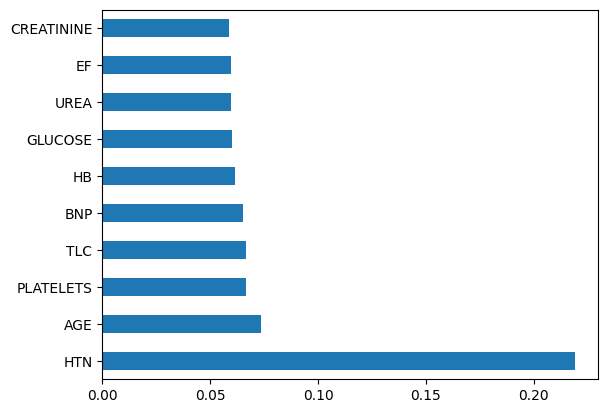

In [ ]:
# let's see feature importances...
print(rf_us_std_clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_us_std_clf.feature_importances_, index=X_train_us_std.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Undersample_Normalized

In [ ]:
# create the random forest classifier
rf_us_nrm_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier
rf_us_nrm_clf.fit(X_train_us_nrm, y_train_us_nrm)

<ipython-input-20-be7d7d5c5cb8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_us_nrm_clf.fit(X_train_us_nrm, y_train_us_nrm)


RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred_us_nrm = rf_us_nrm_clf.predict(X_test_us_nrm)

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_us_nrm, y_pred_us_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_nrm, y_pred_us_nrm))

Accuracy: 0.7703389830508475
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       347
           1       0.91      0.75      0.82       833

    accuracy                           0.77      1180
   macro avg       0.74      0.78      0.75      1180
weighted avg       0.81      0.77      0.78      1180



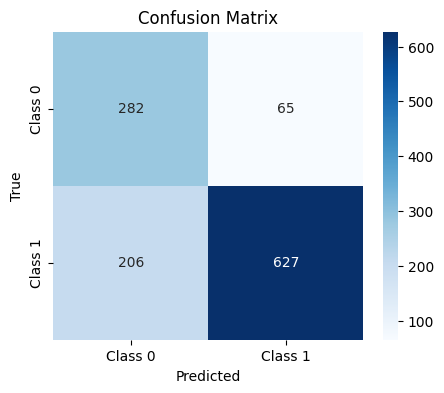

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_nrm, y_pred_us_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

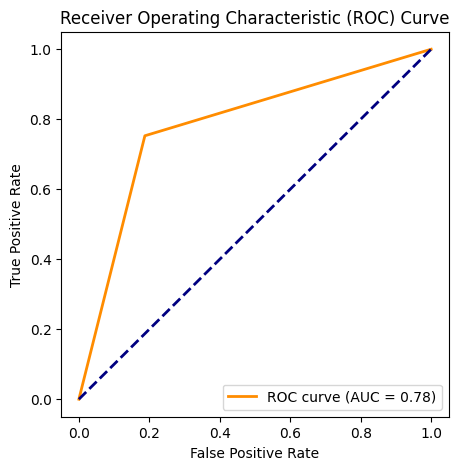

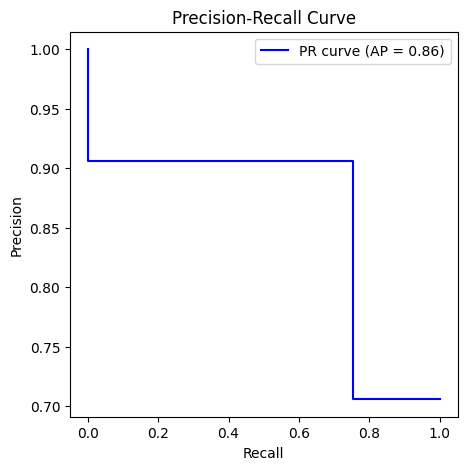

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_nrm, y_pred_us_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_nrm, y_pred_us_nrm)
average_precision = average_precision_score(y_test_us_nrm, y_pred_us_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

[7.81533647e-02 3.95034143e-03 4.51381976e-03 1.27428115e-02
 2.04080203e-01 1.52803957e-02 5.18389961e-03 6.34895322e-02
 6.68480403e-02 6.97798295e-02 6.36144989e-02 5.84593763e-02
 5.81455398e-02 6.60585579e-02 1.11081292e-02 5.93580302e-02
 1.87572221e-03 8.17357173e-03 5.02343192e-03 1.53417294e-02
 1.96667251e-02 9.53523500e-04 3.69700695e-03 3.21022541e-03
 5.32050826e-04 8.37604341e-03 3.44455737e-03 4.98688927e-04
 8.44250175e-03 4.26505254e-03 6.87742250e-04 8.22260543e-04
 4.69864746e-03 5.88701667e-04 1.13013183e-03 1.62012792e-04
 1.58329175e-03 1.05784799e-02 1.15760153e-02 5.74395165e-03
 2.52940560e-03 9.84799794e-03 9.51357866e-03 7.90802700e-03
 8.36255477e-03]


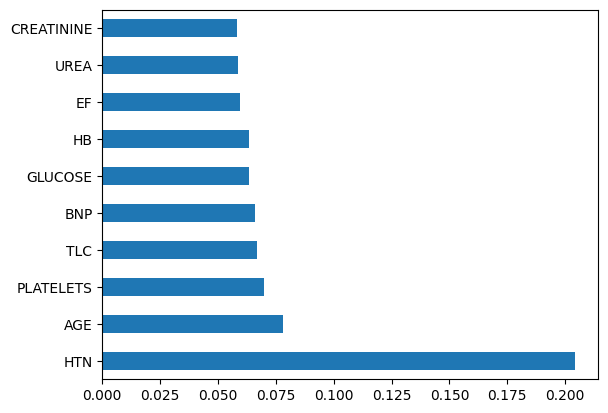

In [ ]:
# let's see feature importances...
print(rf_us_nrm_clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_us_nrm_clf.feature_importances_, index=X_train_us_nrm.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Oversample_Standardized

In [ ]:
# create the random forest classifier
rf_os_std_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier
rf_os_std_clf.fit(X_train_os_std, y_train_os_std)

<ipython-input-26-b2995c3b8e31>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_os_std_clf.fit(X_train_os_std, y_train_os_std)


RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred_os_std = rf_os_std_clf.predict(X_test_os_std)

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_os_std, y_pred_os_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_std, y_pred_os_std))

Accuracy: 0.8008474576271186
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       347
           1       0.85      0.87      0.86       833

    accuracy                           0.80      1180
   macro avg       0.76      0.75      0.76      1180
weighted avg       0.80      0.80      0.80      1180



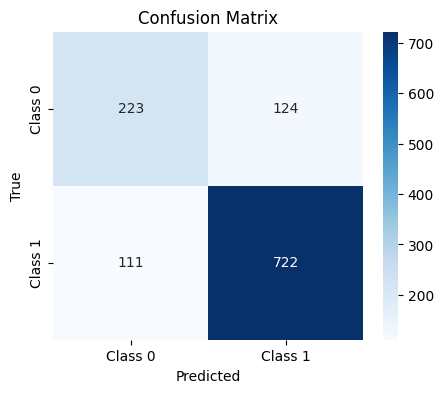

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_std, y_pred_os_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

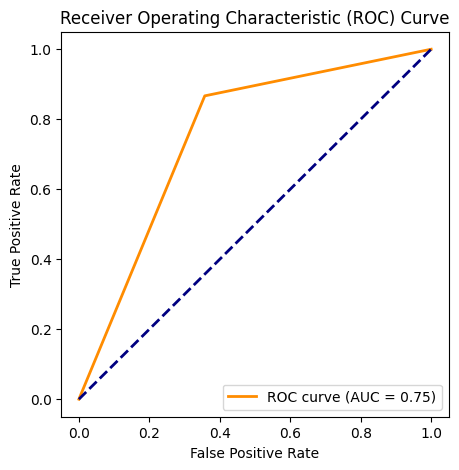

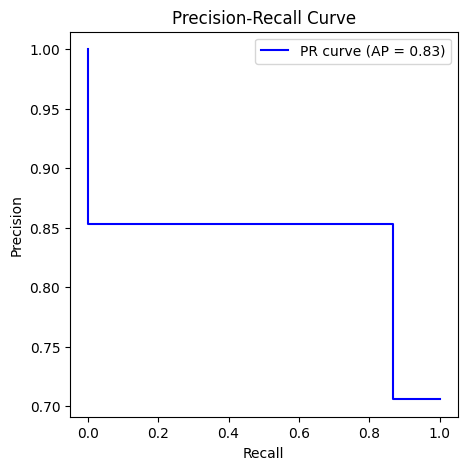

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_std, y_pred_os_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_std, y_pred_os_std)
average_precision = average_precision_score(y_test_os_std, y_pred_os_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

[5.94923564e-02 4.96242326e-02 5.20362459e-02 5.29063944e-02
 5.03604158e-02 5.06682657e-02 4.93797667e-02 5.45840698e-02
 4.93708943e-02 3.29693071e-03 3.32439210e-03 2.74043056e-02
 2.66210108e-01 7.61395986e-03 7.05881397e-03 1.79238092e-02
 1.42901452e-03 9.22929072e-03 8.38796601e-03 3.11476778e-02
 2.70115618e-02 6.45343949e-04 2.34057380e-03 2.32325141e-03
 6.15977611e-04 8.12425239e-03 2.51988403e-03 2.97094132e-04
 5.25694689e-03 3.20048298e-03 9.51399013e-04 7.08342510e-04
 3.83321544e-03 3.97389636e-04 1.30630992e-03 9.77788205e-05
 7.26410914e-04 5.73616372e-03 7.25848067e-03 1.56595901e-03
 2.98703205e-03 1.94207050e-02 2.44303130e-02 1.29113383e-02
 1.38848826e-02]


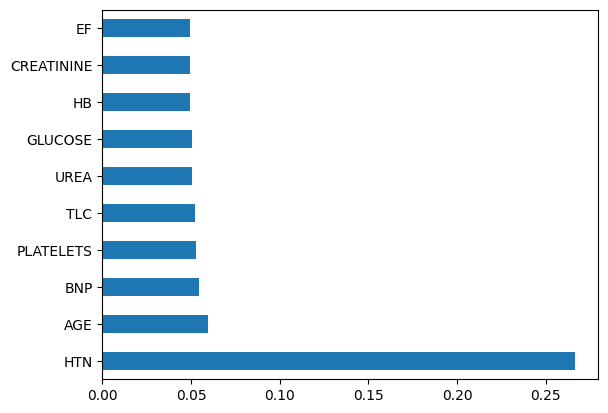

In [ ]:
# let's see feature importances...
print(rf_os_std_clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_os_std_clf.feature_importances_, index=X_train_os_std.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Oversample_Normalized

In [ ]:
# create the random forest classifier
rf_os_nrm_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier
rf_os_nrm_clf.fit(X_train_os_nrm, y_train_os_nrm)

<ipython-input-32-9bdfd5bb0689>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_os_nrm_clf.fit(X_train_os_nrm, y_train_os_nrm)


RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred_os_nrm = rf_os_nrm_clf.predict(X_test_os_nrm)

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_os_nrm, y_pred_os_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_nrm, y_pred_os_nrm))

Accuracy: 0.809322033898305
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       347
           1       0.86      0.87      0.87       833

    accuracy                           0.81      1180
   macro avg       0.77      0.77      0.77      1180
weighted avg       0.81      0.81      0.81      1180



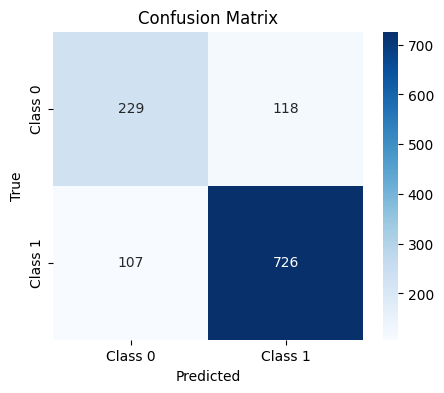

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_nrm, y_pred_os_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

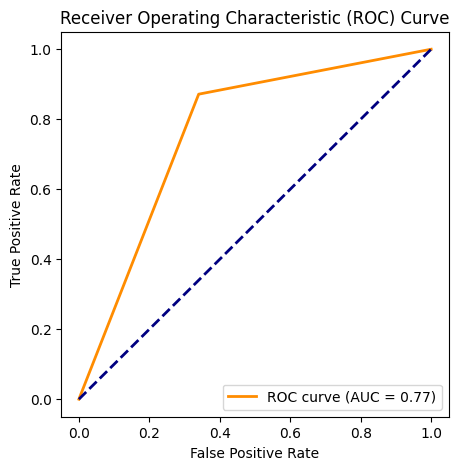

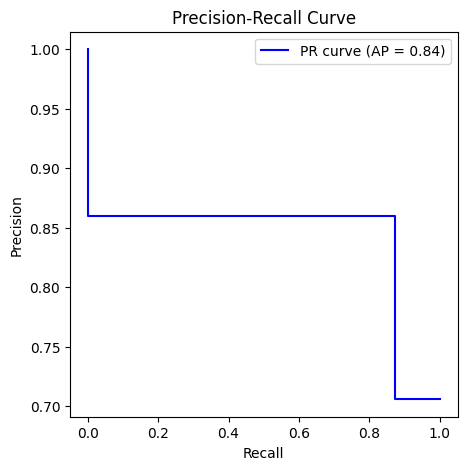

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_nrm, y_pred_os_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_nrm, y_pred_os_nrm)
average_precision = average_precision_score(y_test_os_nrm, y_pred_os_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

[6.04067402e-02 3.35987479e-03 3.41469787e-03 2.76484513e-02
 2.51675928e-01 7.74940769e-03 7.60887596e-03 4.88301570e-02
 5.27115857e-02 5.42454256e-02 5.13338292e-02 5.13854049e-02
 4.89234435e-02 5.66056541e-02 1.77495343e-02 4.95319295e-02
 1.33515385e-03 1.01065128e-02 8.67370935e-03 3.10431823e-02
 2.76270347e-02 6.65744360e-04 2.70598457e-03 2.20374371e-03
 5.47675494e-04 8.27648097e-03 2.29928190e-03 3.82974811e-04
 5.18937525e-03 3.24312452e-03 9.46610880e-04 7.04492216e-04
 4.08778900e-03 4.01923898e-04 1.31593400e-03 8.13570515e-05
 8.50396704e-04 5.70607827e-03 6.84524008e-03 1.68498056e-03
 3.11841121e-03 2.14798215e-02 2.62575413e-02 1.41210223e-02
 1.49174831e-02]


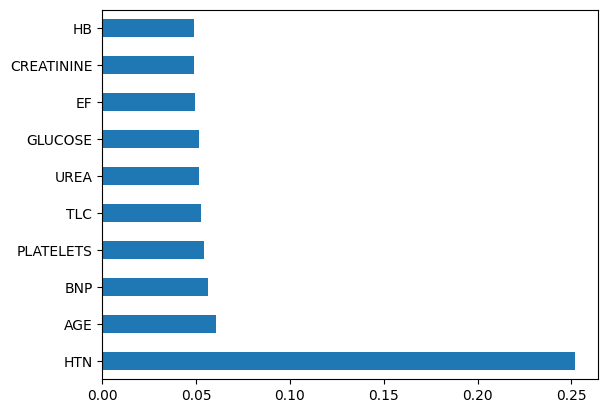

In [ ]:
# let's see feature importances...
print(rf_os_nrm_clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_os_nrm_clf.feature_importances_, index=X_train_os_nrm.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model 2: Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

## Undersample_Standardized

In [ ]:
# Train the classifier
nb_clf.fit(X_train_us_std, y_train_us_std)
# prediction
y_pred_us_std = nb_clf.predict(X_test_us_std)

# Evaluation
accuracy = accuracy_score(y_test_us_std, y_pred_us_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_std, y_pred_us_std))

Accuracy: 0.7194915254237289
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.17      0.27       347
           1       0.73      0.95      0.83       833

    accuracy                           0.72      1180
   macro avg       0.66      0.56      0.55      1180
weighted avg       0.69      0.72      0.66      1180



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


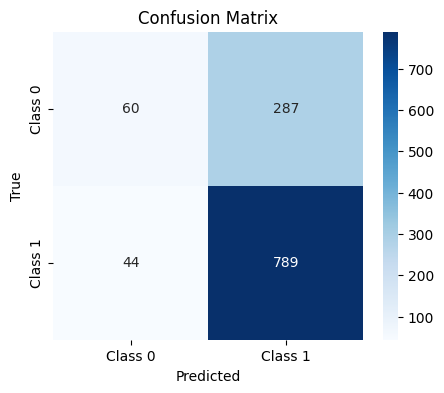

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_std, y_pred_us_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

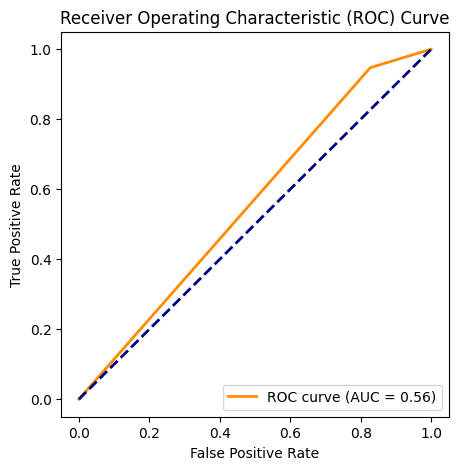

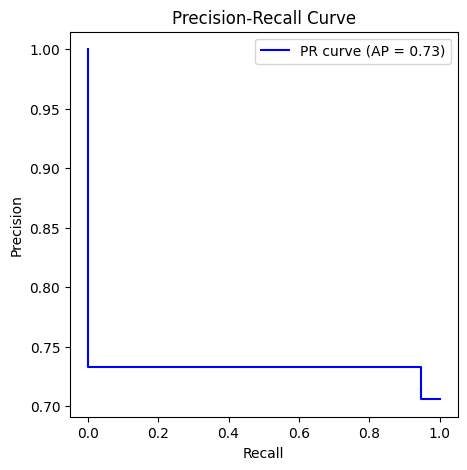

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_std, y_pred_us_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_std, y_pred_us_std)
average_precision = average_precision_score(y_test_us_std, y_pred_us_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Undersample_Normalized

In [ ]:
# Train the classifier
nb_clf.fit(X_train_us_nrm, y_train_us_nrm)
# prediction
y_pred_us_nrm = nb_clf.predict(X_test_us_nrm)

# Evaluation
accuracy = accuracy_score(y_test_us_nrm, y_pred_us_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_nrm, y_pred_us_nrm))

Accuracy: 0.7203389830508474
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.17      0.27       347
           1       0.73      0.95      0.83       833

    accuracy                           0.72      1180
   macro avg       0.66      0.56      0.55      1180
weighted avg       0.69      0.72      0.66      1180



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


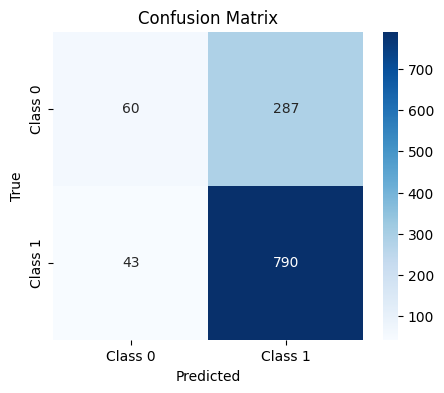

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_nrm, y_pred_us_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

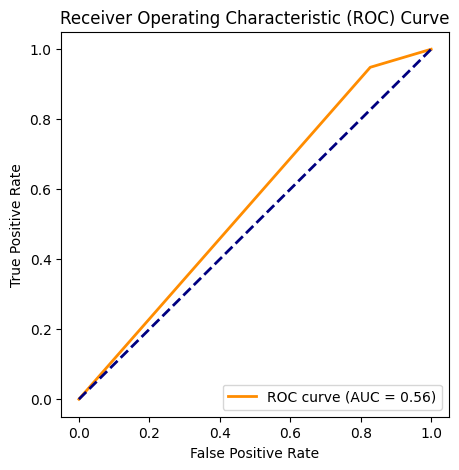

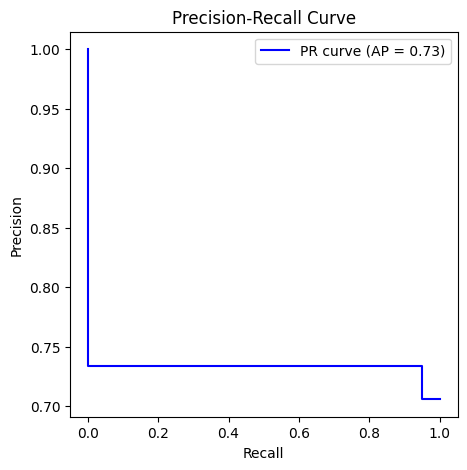

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_nrm, y_pred_us_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_nrm, y_pred_us_nrm)
average_precision = average_precision_score(y_test_us_nrm, y_pred_us_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Standardized

In [ ]:
# Train the classifier
nb_clf.fit(X_train_os_std, y_train_os_std)
# prediction
y_pred_os_std = nb_clf.predict(X_test_os_std)

# Evaluation
accuracy = accuracy_score(y_test_os_std, y_pred_os_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_std, y_pred_os_std))

Accuracy: 0.7432203389830508
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46       347
           1       0.78      0.90      0.83       833

    accuracy                           0.74      1180
   macro avg       0.69      0.64      0.65      1180
weighted avg       0.72      0.74      0.72      1180



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


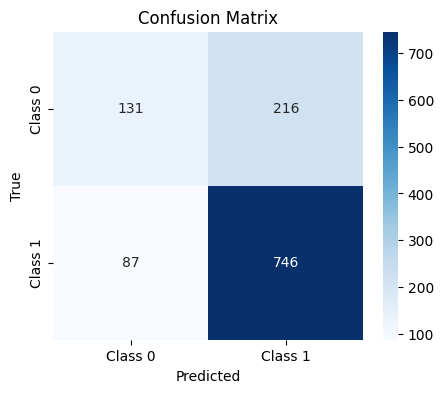

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_std, y_pred_os_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

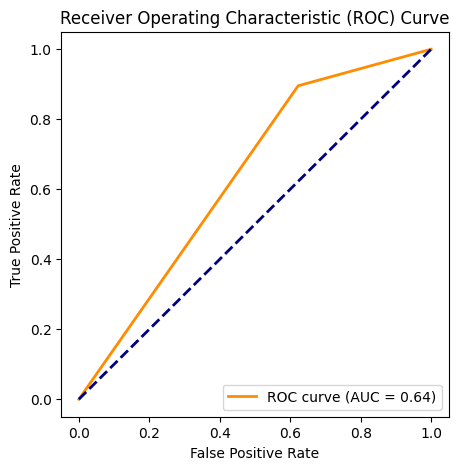

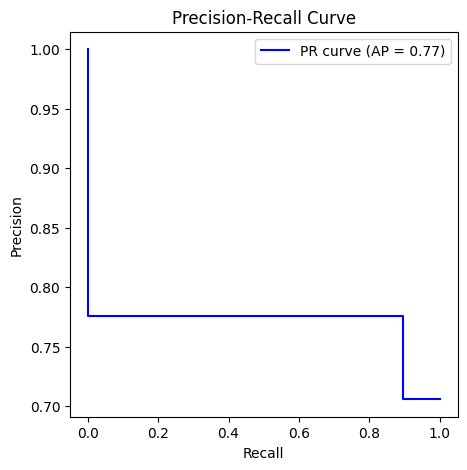

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_std, y_pred_os_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_std, y_pred_os_std)
average_precision = average_precision_score(y_test_os_std, y_pred_os_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Normalized

In [ ]:
# Train the classifier
nb_clf.fit(X_train_os_nrm, y_train_os_nrm)
# prediction
y_pred_os_nrm = nb_clf.predict(X_test_os_nrm)

# Evaluation
accuracy = accuracy_score(y_test_os_nrm, y_pred_os_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_nrm, y_pred_os_nrm))

Accuracy: 0.7432203389830508
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.35      0.45       347
           1       0.77      0.91      0.83       833

    accuracy                           0.74      1180
   macro avg       0.69      0.63      0.64      1180
weighted avg       0.72      0.74      0.72      1180



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


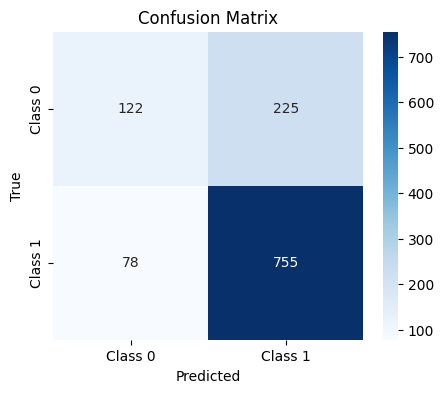

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_nrm, y_pred_os_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

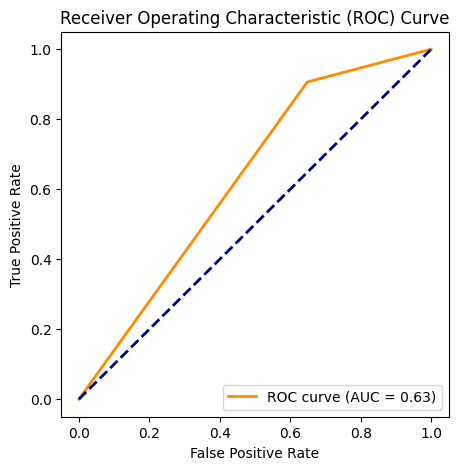

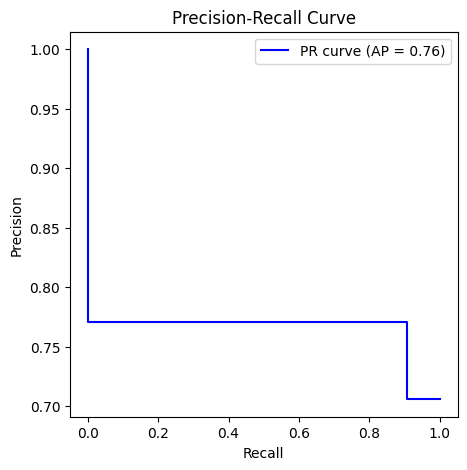

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_nrm, y_pred_os_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_nrm, y_pred_os_nrm)
average_precision = average_precision_score(y_test_os_nrm, y_pred_os_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

Want to try two different Naives Bayes based on

# Naives Bayes, but with two versions (AVOID)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
continuous_columns = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP','EF']
discrete_columns = ['SMOKING', 'ALCOHOL', 'DM', 'HTN', 'PRIOR CMP', 'CKD',
       'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'onehotencoder__GENDER_F',
       'onehotencoder__GENDER_M', 'onehotencoder__RURAL_R',
       'onehotencoder__RURAL_U']

In [ ]:
# Define preprocessing for continuous and discrete features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', GaussianNB(), continuous_columns),
        ('cat', MultinomialNB(), discrete_columns)
    ])



In [ ]:
# Create a pipeline with preprocessing and the Naive Bayes classifier
nb_2_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])  # Adjust the classifier based on your data

## Undersample_Standardized

In [ ]:
# Train the classifier
nb_2_clf.fit(X_train_us_std, y_train_us_std)

# Make predictions
y_pred_us_std = nb_2_clf.predict(X_test_us_std)

# Evaluation
accuracy = accuracy_score(y_test_us_std, y_pred_us_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_std, y_pred_us_std))

TypeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_std, y_pred_us_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_std, y_pred_us_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_std, y_pred_us_std)
average_precision = average_precision_score(y_test_us_std, y_pred_us_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Undersample_Normalized

In [ ]:
# Train the classifier
nb_2_clf.fit(X_train_us_nrm, y_train_us_nrm)

# Make predictions
y_pred_us_nrm = nb_2_clf.predict(X_test_us_nrm)

# Evaluation
accuracy = accuracy_score(y_test_us_nrm, y_pred_us_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_nrm, y_pred_us_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_nrm, y_pred_us_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_nrm, y_pred_us_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_nrm, y_pred_us_nrm)
average_precision = average_precision_score(y_test_us_nrm, y_pred_us_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Standardized

In [ ]:
# Train the classifier
nb_2_clf.fit(X_train_os_std, y_train_os_std)

# Make predictions
y_pred_os_std = nb_2_clf.predict(X_test_os_std)

# Evaluation
accuracy = accuracy_score(y_test_os_std, y_pred_os_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_std, y_pred_os_std))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_std, y_pred_os_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_std, y_pred_os_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_std, y_pred_os_std)
average_precision = average_precision_score(y_test_os_std, y_pred_os_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Normalized

In [ ]:
# Train the classifier
nb_2_clf.fit(X_train_os_nrm, y_train_os_nrm)

# Make predictions
y_pred_os_nrm = nb_2_clf.predict(X_test_os_nrm)

# Evaluation
accuracy = accuracy_score(y_test_os_nrm, y_pred_os_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_nrm, y_pred_os_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_nrm, y_pred_os_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_nrm, y_pred_os_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_nrm, y_pred_os_nrm)
average_precision = average_precision_score(y_test_os_nrm, y_pred_os_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Support Vector Machine (SVM)

In [ ]:
# import library/libraries
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create an SVM classifier (you can choose different kernel functions, e.g., 'linear', 'rbf', etc.)
svm_clf = svm.SVC(kernel='linear', C=1)  # Example with a linear kernel and regularization parameter C=1

## Undersample_Standardized

In [ ]:
# train on training data
svm_clf.fit(X_train_us_std, y_train_us_std)

# Make predictions on the test set
y_pred_us_std = svm_clf.predict(X_test_us_std)

# Evaluation
accuracy = accuracy_score(y_test_us_std, y_pred_us_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_std, y_pred_us_std))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_std, y_pred_us_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_std, y_pred_us_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_std, y_pred_us_std)
average_precision = average_precision_score(y_test_us_std, y_pred_us_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Undersample_Normalized

In [ ]:
# train on training data
svm_clf.fit(X_train_us_nrm, y_train_us_nrm)

# Make predictions on the test set
y_pred_us_nrm = svm_clf.predict(X_test_us_nrm)

# Evaluation
accuracy = accuracy_score(y_test_us_nrm, y_pred_us_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_nrm, y_pred_us_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_nrm, y_pred_us_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_nrm, y_pred_us_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_nrm, y_pred_us_nrm)
average_precision = average_precision_score(y_test_us_nrm, y_pred_us_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversampled_Standardized

In [ ]:
# train on training data
svm_clf.fit(X_train_os_std, y_train_os_std)

# Make predictions on the test set
y_pred_os_std = svm_clf.predict(X_test_os_std)

# Evaluation
accuracy = accuracy_score(y_test_os_std, y_pred_os_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_std, y_pred_os_std))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_std, y_pred_os_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_std, y_pred_os_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_std, y_pred_os_std)
average_precision = average_precision_score(y_test_os_std, y_pred_os_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Normalized

In [ ]:
# train on training data
svm_clf.fit(X_train_os_nrm, y_train_os_nrm)

# Make predictions on the test set
y_pred_os_nrm = svm_clf.predict(X_test_os_nrm)

# Evaluation
accuracy = accuracy_score(y_test_os_nrm, y_pred_os_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_nrm, y_pred_os_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_nrm, y_pred_os_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_nrm, y_pred_os_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_nrm, y_pred_os_nrm)
average_precision = average_precision_score(y_test_os_nrm, y_pred_os_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

BLLOOOOOOOOOCCKKKK


# Support Vector Machine (SVM) VER 2 (TESTING ONLY)

In [ ]:
# import library/libraries
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create an SVM classifier (you can choose different kernel functions, e.g., 'linear', 'rbf', etc.)
svm_clf = svm.SVC(kernel='poly', degree=3)  # Example with a linear kernel and regularization parameter C=1

## Undersample_Standardized

In [ ]:
# train on training data
svm_clf.fit(X_train_us_std, y_train_us_std)

# Make predictions on the test set
y_pred_us_std = svm_clf.predict(X_test_us_std)

# Evaluation
accuracy = accuracy_score(y_test_us_std, y_pred_us_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_std, y_pred_us_std))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_std, y_pred_us_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_std, y_pred_us_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_std, y_pred_us_std)
average_precision = average_precision_score(y_test_us_std, y_pred_us_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Undersample_Normalized

In [ ]:
# train on training data
svm_clf.fit(X_train_us_nrm, y_train_us_nrm)

# Make predictions on the test set
y_pred_us_nrm = svm_clf.predict(X_test_us_nrm)

# Evaluation
accuracy = accuracy_score(y_test_us_nrm, y_pred_us_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_us_nrm, y_pred_us_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_us_nrm, y_pred_us_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_us_nrm, y_pred_us_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_us_nrm, y_pred_us_nrm)
average_precision = average_precision_score(y_test_us_nrm, y_pred_us_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversampled_Standardized

In [ ]:
# train on training data
svm_clf.fit(X_train_os_std, y_train_os_std)

# Make predictions on the test set
y_pred_os_std = svm_clf.predict(X_test_os_std)

# Evaluation
accuracy = accuracy_score(y_test_os_std, y_pred_os_std)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_std, y_pred_os_std))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_std, y_pred_os_std)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_std, y_pred_os_std)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_std, y_pred_os_std)
average_precision = average_precision_score(y_test_os_std, y_pred_os_std)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Oversample_Normalized

In [ ]:
# train on training data
svm_clf.fit(X_train_os_nrm, y_train_os_nrm)

# Make predictions on the test set
y_pred_os_nrm = svm_clf.predict(X_test_os_nrm)

# Evaluation
accuracy = accuracy_score(y_test_os_nrm, y_pred_os_nrm)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test_os_nrm, y_pred_os_nrm))

In [ ]:
from sklearn.metrics import confusion_matrix

# Example:
# predictions = your_model.predict(X_test)
# true_labels = y_test

# Create confusion matrix
cm = confusion_matrix(y_test_os_nrm, y_pred_os_nrm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# trying to plot the ROC and Precision-Recall Graphs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_thresholds = roc_curve(y_test_os_nrm, y_pred_os_nrm)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for each class
precision, recall, pr_thresholds = precision_recall_curve(y_test_os_nrm, y_pred_os_nrm)
average_precision = average_precision_score(y_test_os_nrm, y_pred_os_nrm)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(5, 5))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()